In [2]:
# %config IPCompleter.greedy=True

In [3]:
%config Completer.use_jedi = False

## Import Module 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from luwiji.knn import illustration, demo

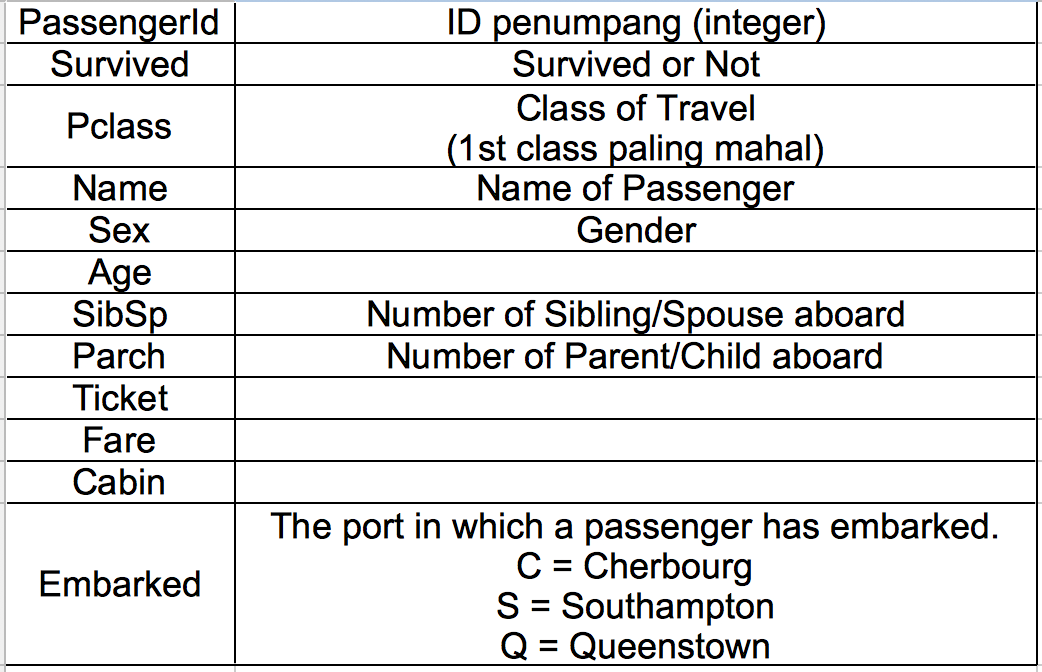

In [5]:
illustration.nomenklatur

In [6]:
df = pd.read_csv("E:\Data Science\Python\machine learning exercises\dataset\\titanic.csv", index_col = "PassengerId")

In [7]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
un_used = df[['Name', 'Cabin', 'Ticket', 'Age']]

## Quick EDA

In [9]:
from jcopml.plot import plot_missing_value

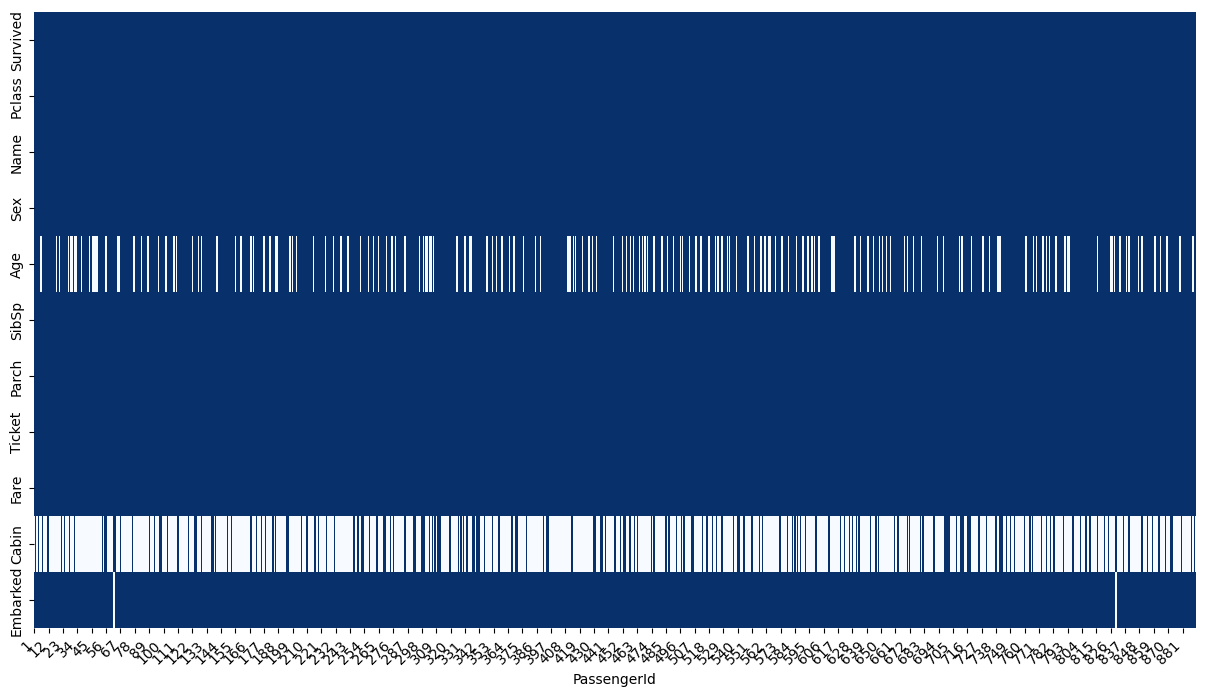

In [10]:
plot_missing_value(df)

## Drop Unnecessary  Columns

In [11]:
df.drop(['Name', 'Cabin', 'Ticket', 'Age'], inplace = True, axis = 1)

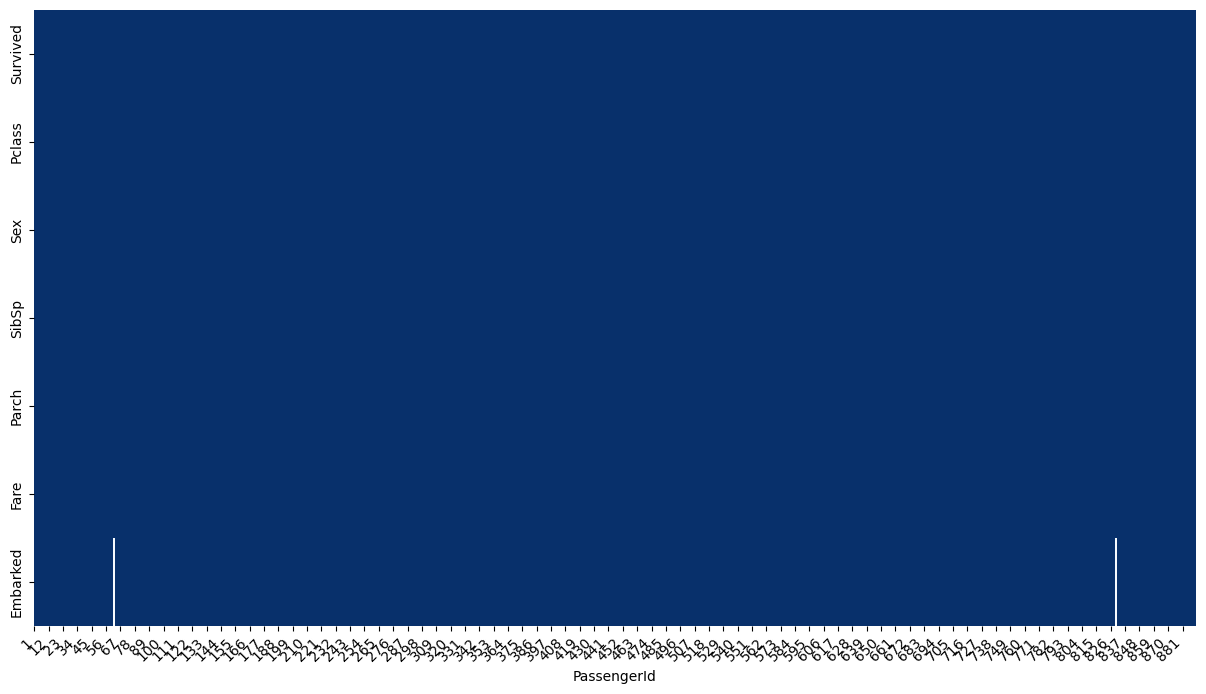

In [12]:
plot_missing_value(df)

In [13]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
df.fillna({'Embarked': 'S'}, inplace = True)

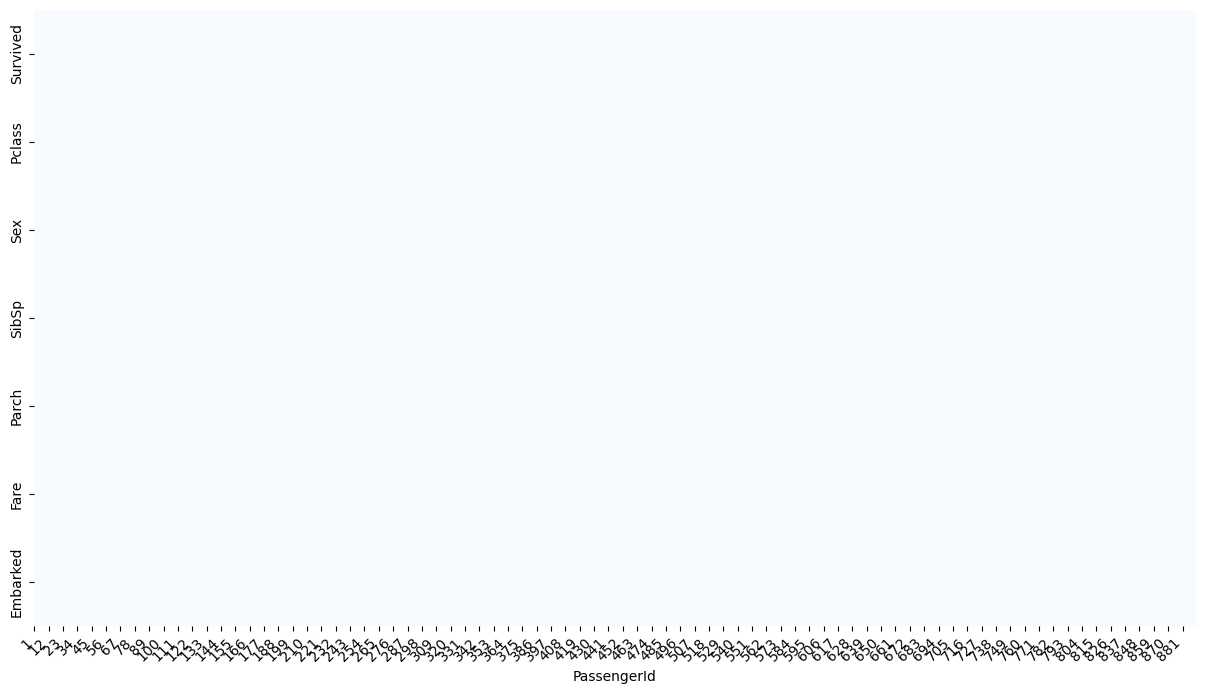

In [15]:
plot_missing_value(df)

In [16]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S


## Select Feature & Target

In [17]:
X = df.drop('Survived', axis = 1)
y = df.Survived

## One hot encoding

In [18]:
X = pd.get_dummies(X, columns = ['Pclass', 'Sex', 'Embarked'])

In [19]:
X

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,1,0,7.2500,0,0,1,0,1,0,0,1
2,1,0,71.2833,1,0,0,1,0,1,0,0
3,0,0,7.9250,0,0,1,1,0,0,0,1
4,1,0,53.1000,1,0,0,1,0,0,0,1
5,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,0,13.0000,0,1,0,0,1,0,0,1
888,0,0,30.0000,1,0,0,1,0,0,0,1
889,1,2,23.4500,0,0,1,1,0,0,0,1


## Import Sklearn

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors = 1, weights='distance')
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1, weights='distance')

In [22]:
knn.score(X, y)

0.8787878787878788

#### Accuracy without split : 87%

## Split Data Train and Test : Concept 1


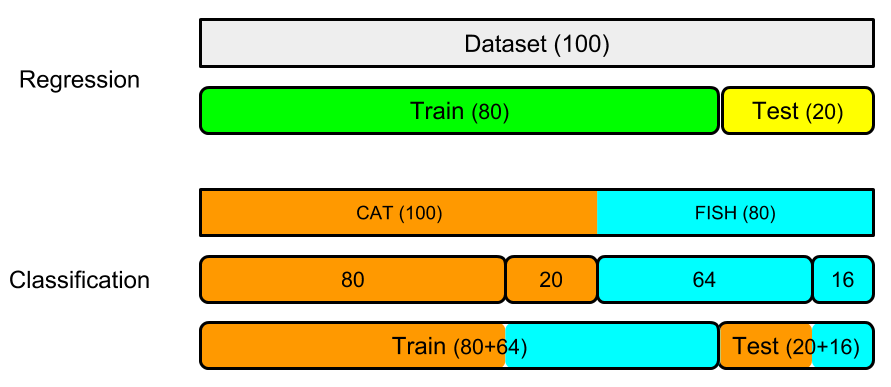

In [23]:
illustration.train_test_split

In [24]:
survived_info = pd.DataFrame(df.Survived)

In [25]:
survived_info.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [26]:
X = df.drop('Survived', axis = 1)
y = df.Survived

X = pd.get_dummies(X, columns = ['Pclass', 'Sex', 'Embarked'])

## KNN Model

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 

In [28]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

train_X.shape, test_X.shape, train_y.shape, test_y.shape

((712, 11), (179, 11), (712,), (179,))

In [29]:
test_x_counts = pd.DataFrame(train_y)
test_y_counts = pd.DataFrame(test_y)

In [30]:
survived_info.Survived.value_counts(), test_x_counts.Survived.value_counts(), test_y_counts.Survived.value_counts()

(0    549
 1    342
 Name: Survived, dtype: int64,
 0    439
 1    273
 Name: Survived, dtype: int64,
 0    110
 1     69
 Name: Survived, dtype: int64)

In [31]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=1)

In [32]:
knn.score(train_X, train_y), knn.score(test_X, test_y)

(0.9101123595505618, 0.7262569832402235)

#### Model with split train test stratify : accuracy train 91% test 72%. overfitting 

#### Because score in test much different from train, It's overfitting 

## Split Data Train and Test : Concept 2 (KFold Cross Validation)

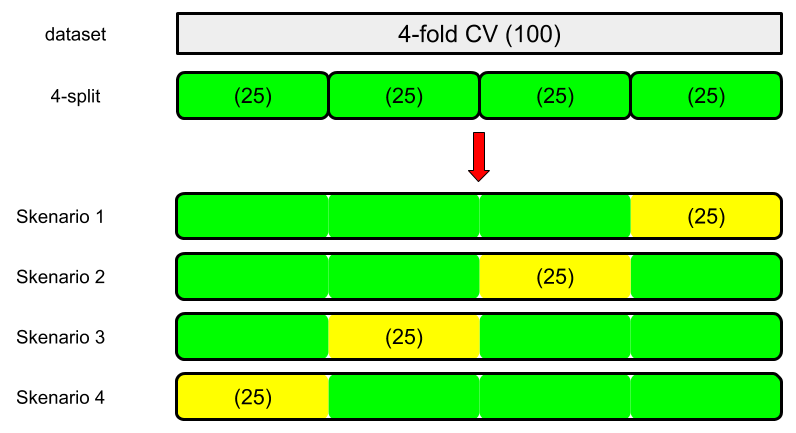

In [33]:
illustration.kfold_cv

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
knn = KNeighborsClassifier(n_neighbors = 1)
cross_val_score(knn, X, y, cv = 5)


array([0.63687151, 0.63483146, 0.80337079, 0.73033708, 0.71348315])

In [36]:
cross_val_score(knn, X, y, cv = 5).mean()

0.703778796058

#### Model with kfold cross validation : Accuracy 70%

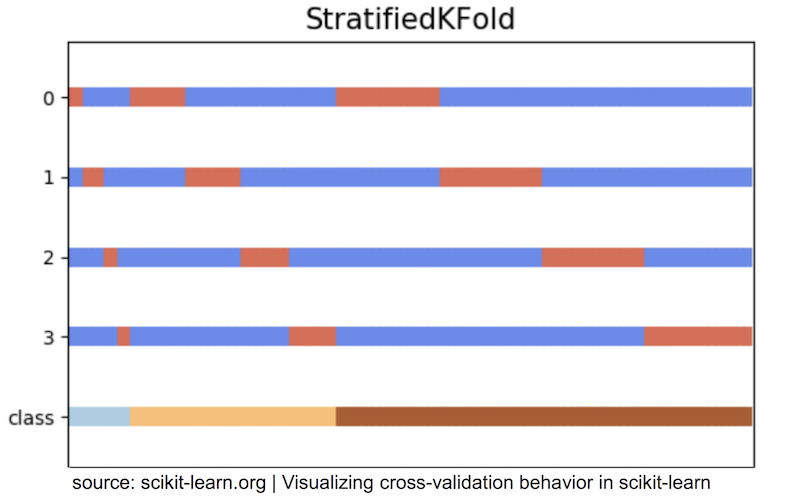

In [37]:
illustration.strat_kfold_cv

## Feature Scaling MinMax

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()
scaler.fit(train_X)

MinMaxScaler()

In [40]:
train_X_sc = scaler.transform(train_X)
test_X_sc = scaler.transform(test_X)

In [41]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(train_X_sc, train_y)

KNeighborsClassifier(n_neighbors=1)

In [42]:
knn.score(train_X_sc, train_y), knn.score(test_X_sc, test_y)

(0.8890449438202247, 0.6983240223463687)

#### Model with split train test stratify and feature scaling : accuracy train 88% test 69%. overfitting 

## Feature Scaling with Kfold Cross Validations

In [43]:
scaler2 = MinMaxScaler()
scaler2.fit(X)
X_sc = scaler2.transform(X)

knn = KNeighborsClassifier(n_neighbors = 1)
cross_val_score(knn, X_sc, y, cv = 5)

array([0.69273743, 0.69662921, 0.78089888, 0.75280899, 0.7247191 ])

In [44]:
cross_val_score(knn, X_sc, y, cv = 5).mean()

0.7295587219885757

#### Model with kfold cross validation : accuracy 72%

## Improvement model

In [45]:
# Parameter Tunning
# Without Scaling

n_neighbors = range(1, 50, 2)
train_score = []
test_score = []

for i in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(train_X, train_y)

    train = knn.score(train_X, train_y)
    test = knn.score(test_X, test_y)

    train_score.append(train)
    test_score.append(test)

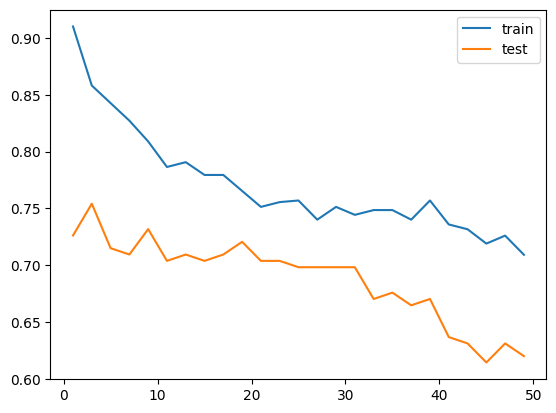

In [46]:
import matplotlib.pyplot as plt

plt.plot(n_neighbors,train_score, label = 'train')
plt.plot(n_neighbors, test_score, label = 'test')
plt.legend()

In [47]:
print(f"Maximum Test Score : {max(test_score)}")
print(f"Index : {n_neighbors[np.argmax(test_score)]}")


Maximum Test Score : 0.7541899441340782
Index : 3


In [48]:
n_neighbors[np.argmin(test_score)]

45

In [49]:
## Parameter Tuning
## With Scaling

n_neighbors = range(1, 50, 2)

train_score = []
test_score = []

for i in n_neighbors:

    knn = KNeighborsClassifier(n_neighbors = i, weights = "distance")
    knn.fit(train_X_sc, train_y)

    train = knn.score(train_X_sc, train_y)
    test = knn.score(test_X_sc, test_y)

    train_score.append(train)
    test_score.append(test)

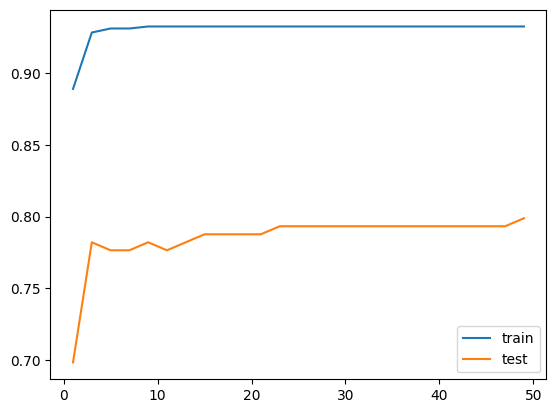

In [50]:
plt.plot(n_neighbors, train_score, label = 'train')
plt.plot(n_neighbors, test_score, label = "test")
plt.legend()

In [51]:
print(f"Maximum test score {max(test_score)}")
print(f"N neighbors : {n_neighbors[np.argmax(test_score)]}")

Maximum test score 0.7988826815642458
N neighbors : 49


In [52]:
## Parameter Tuning
## With Kfold cross validation

n_neighbors = range(1, 50, 2)

test_score = []

for i in n_neighbors:

    knn = KNeighborsClassifier(n_neighbors = i, weights = "distance")
    test = cross_val_score(knn, X_sc, y).mean()

    test_score.append(test)

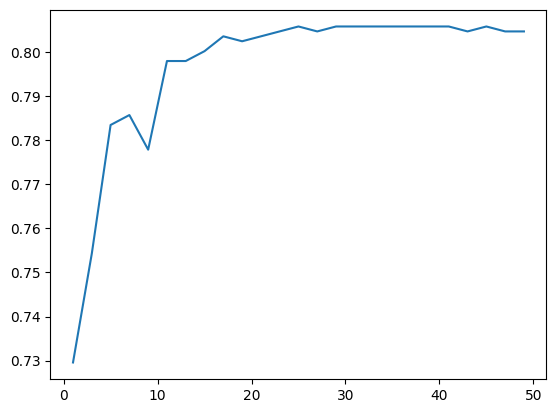

In [53]:
plt.plot(n_neighbors, test_score)

In [54]:
print(f"Max neighbors : {max(test_score)}")
print(f"N neighbors : {n_neighbors[np.argmax(test_score)]}")

Max neighbors : 0.8058690603226415
N neighbors : 25
